In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import os
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow import keras
from sklearn import model_selection
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
os.chdir(r"C:\Users\tarsa\OneDrive\Desktop")

In [3]:
# Load data from CSV file
df = pd.read_csv('Final_VI_Rice.csv')

In [4]:
df.head()

,LAI,NDVI,EVI,GNDVI,RENDVI,WDRVI,CI,NDRE,lai
0,2.13,0.200000,-0.056558,0.146981,0.164092,0.312500,0.500000,0.164092,5.309000
1,2.38,0.167983,0.026644,0.144479,0.145846,0.268519,0.403797,0.145846,4.960939
2,2.38,0.359016,0.055946,0.289016,0.323044,0.504550,1.120203,0.323044,7.552894
3,1.19,0.152680,-0.083496,0.092502,0.127749,0.246773,0.360384,0.127749,4.803869
4,1.94,0.351517,0.945704,0.319395,0.271188,0.495790,1.090173,0.271188,7.444245


## scatter plot of the ground LAI versus the satellite LAI

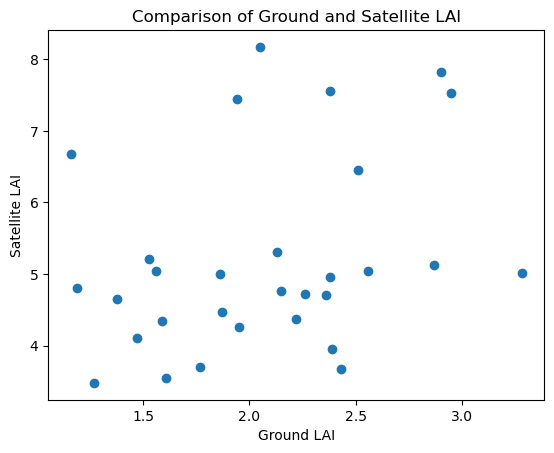

In [5]:
plt.scatter(df['LAI'], df['lai'])

plt.xlabel('Ground LAI')
plt.ylabel('Satellite LAI')
plt.title('Comparison of Ground and Satellite LAI')

plt.show()


## scatter plot of Ground LAI versus vegetation index

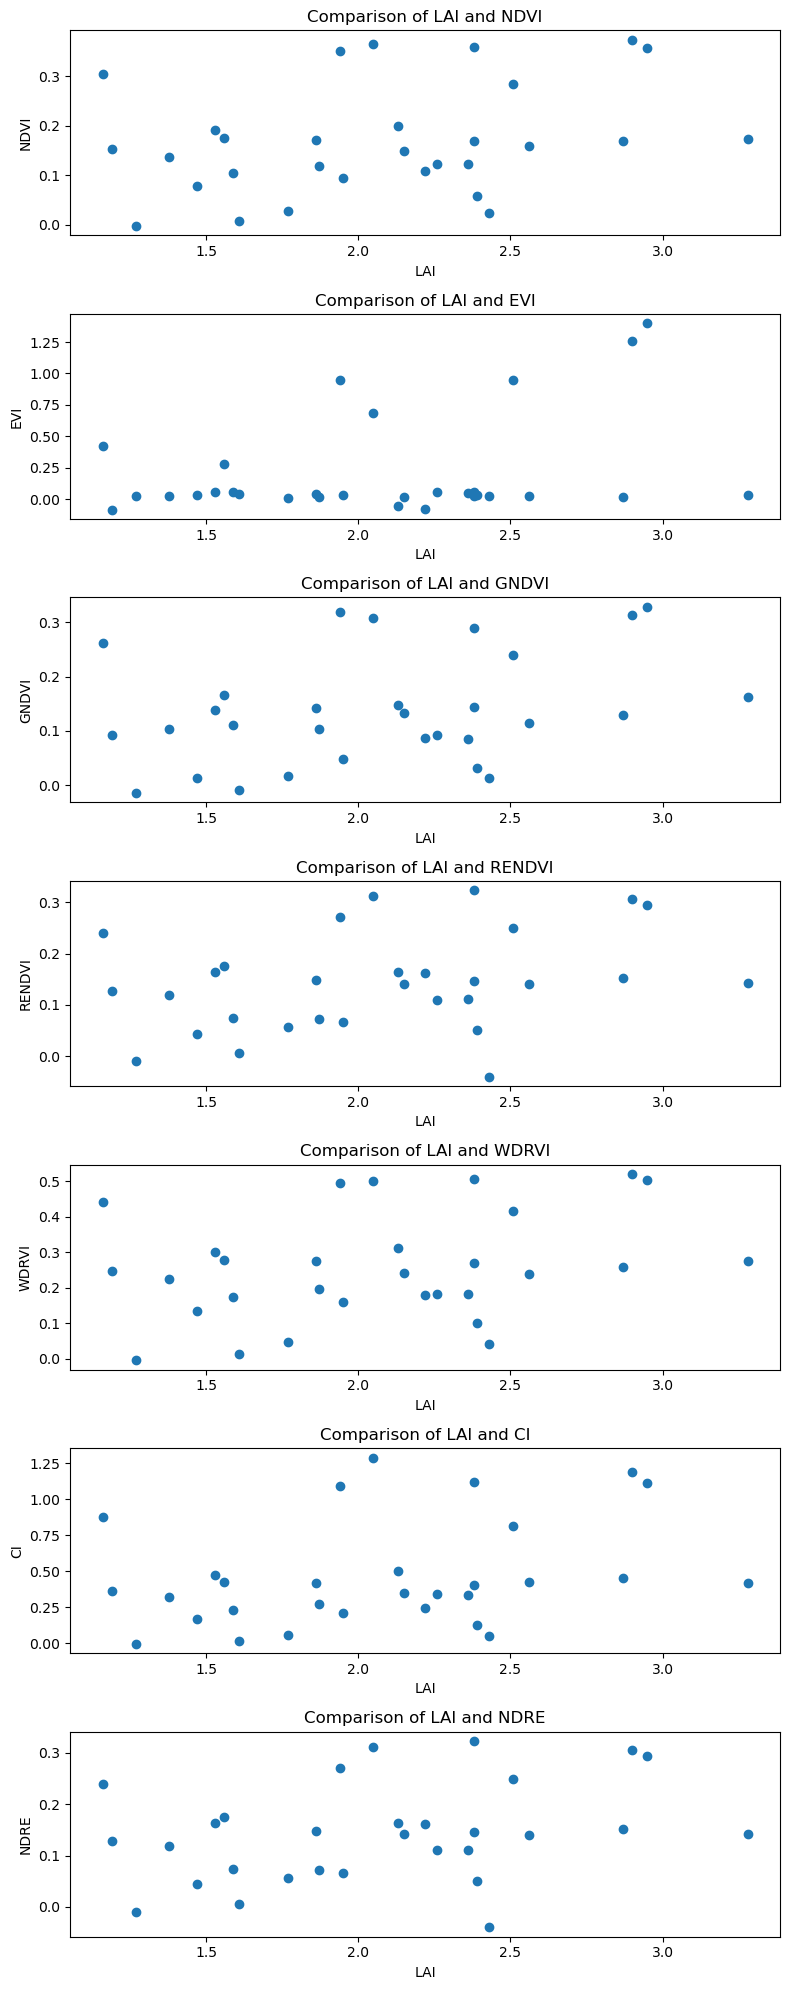

In [18]:
# Define a list of vegetation indices to compare with LAI
vi_list = ['NDVI', 'EVI', 'GNDVI', 'RENDVI', 'WDRVI', 'CI', 'NDRE']

# Create a figure with subplots for each vegetation index
fig, axes = plt.subplots(nrows=len(vi_list), ncols=1, figsize=(8, 20))

# Loop through each vegetation index and create a scatter plot of LAI versus that index
for i, vi in enumerate(vi_list):
    ax = axes[i]
    ax.scatter(new_df['LAI'], df[vi])
    ax.set_xlabel('LAI')
    ax.set_ylabel(vi)
    ax.set_title(f'Comparison of LAI and {vi}')

# Adjust the spacing between subplots and save the figure
fig.tight_layout()

# Show the plot
plt.show()


## scatter plot of Satellite LAI versus vegetation index

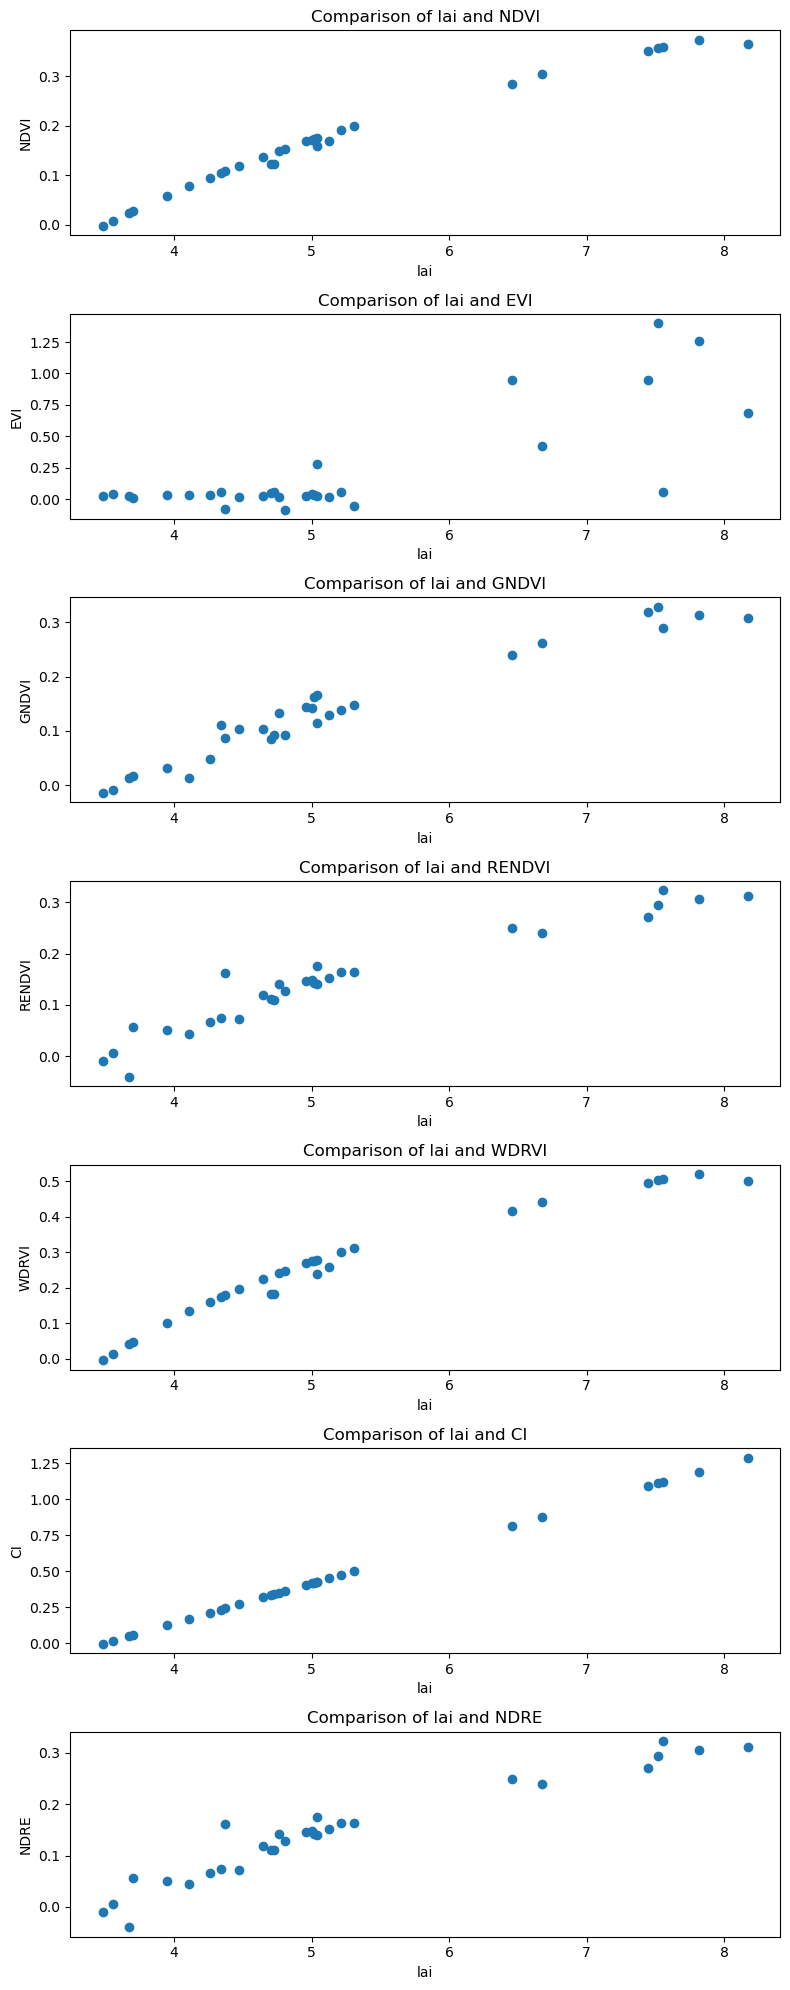

In [19]:
# Define a list of vegetation indices to compare with LAI
vi_list = ['NDVI', 'EVI', 'GNDVI', 'RENDVI', 'WDRVI', 'CI', 'NDRE']

# Create a figure with subplots for each vegetation index
fig, axes = plt.subplots(nrows=len(vi_list), ncols=1, figsize=(8, 20))

# Loop through each vegetation index and create a scatter plot of Satellite LAI versus that index
for i, vi in enumerate(vi_list):
    ax = axes[i]
    ax.scatter(df['lai'], df[vi])
    ax.set_xlabel('lai')
    ax.set_ylabel(vi)
    ax.set_title(f'Comparison of lai and {vi}')

# Adjust the spacing between subplots and save the figure
fig.tight_layout()
plt.savefig('comparison.png')

# Show the plot
plt.show()


In [20]:
new_df.head()

,LAI,NDVI,EVI,GNDVI,RENDVI,WDRVI,CI,NDRE,lai
0,2.13,0.200000,-0.056558,0.146981,0.164092,0.312500,0.500000,0.164092,5.309000
1,2.38,0.167983,0.026644,0.144479,0.145846,0.268519,0.403797,0.145846,4.960939
2,2.38,0.359016,0.055946,0.284023,0.323044,0.504550,1.120203,0.323044,7.552894
3,1.19,0.152680,-0.083496,0.092502,0.127749,0.246773,0.360384,0.127749,4.803869
4,1.94,0.351517,0.945704,0.284023,0.271188,0.495790,1.090173,0.271188,7.444245


### *Removal of outliers

### EVI Capping

{'whiskers': [<matplotlib.lines.Line2D at 0x24c37447580>,
 'caps': [<matplotlib.lines.Line2D at 0x24c37447b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c374472b0>],
 'medians': [<matplotlib.lines.Line2D at 0x24c3990a100>],
 'fliers': [<matplotlib.lines.Line2D at 0x24c3990a3d0>],
 'means': []}

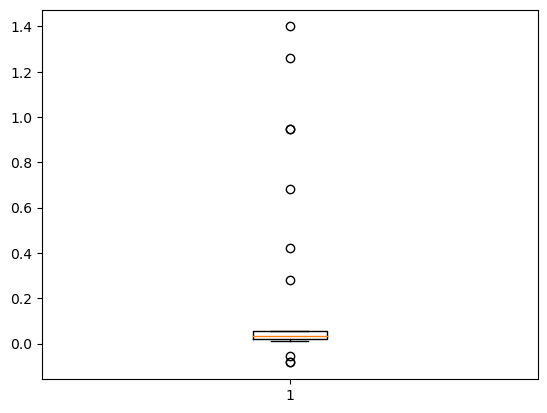

In [7]:
plt.boxplot(df['EVI'])

In [8]:
# Calculate upper and lower bounds for capping
Q1 = df['EVI'].quantile(0.25)
Q3 = df['EVI'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [9]:
print(lower_limit)
print(upper_limit)

-0.029438732750000002
0.10684068725000001


In [10]:
new_df = df.copy()

new_df['EVI'] = np.where(
    new_df['EVI'] > upper_limit,
    upper_limit,
    np.where(
        new_df['EVI'] < lower_limit,
        lower_limit,
        new_df['EVI']
    )
)

In [11]:
new_df.shape

(30, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x24c39974220>,
 'caps': [<matplotlib.lines.Line2D at 0x24c399747c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c39965f10>],
 'medians': [<matplotlib.lines.Line2D at 0x24c39974d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x24c39982070>],
 'means': []}

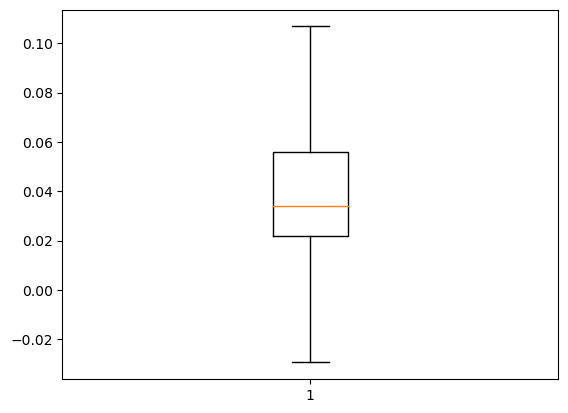

In [12]:
plt.boxplot(new_df['EVI'])

### GNDVI Capping

{'whiskers': [<matplotlib.lines.Line2D at 0x24c399d6640>,
 'caps': [<matplotlib.lines.Line2D at 0x24c399d6be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c399d6370>],
 'medians': [<matplotlib.lines.Line2D at 0x24c399e51c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24c399e5490>],
 'means': []}

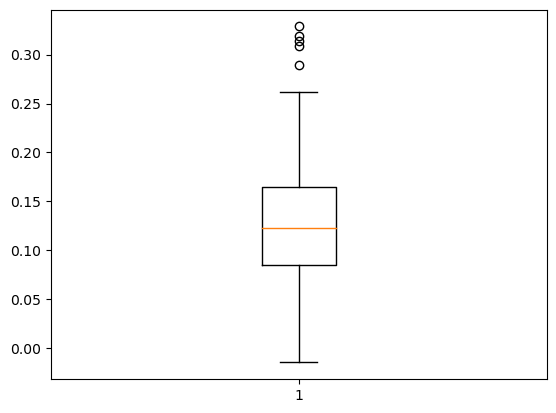

In [13]:
plt.boxplot(df['GNDVI'])

In [14]:

# Calculate upper and lower bounds for capping
Q1 = df['GNDVI'].quantile(0.25)
Q3 = df['GNDVI'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [15]:
print(lower_limit)
print(upper_limit)

-0.03464036499999999
0.284023335


In [16]:
new_df = df.copy()

new_df['GNDVI'] = np.where(
    new_df['GNDVI'] > upper_limit,
    upper_limit,
    np.where(
        new_df['GNDVI'] < lower_limit,
        lower_limit,
        new_df['GNDVI']
    )
)

{'whiskers': [<matplotlib.lines.Line2D at 0x24c39b78b80>,
 'caps': [<matplotlib.lines.Line2D at 0x24c39a06160>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c39b788b0>],
 'medians': [<matplotlib.lines.Line2D at 0x24c39a06700>],
 'fliers': [<matplotlib.lines.Line2D at 0x24c39a069d0>],
 'means': []}

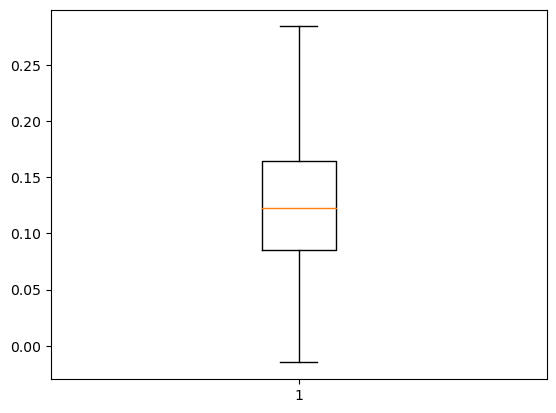

In [17]:
plt.boxplot(new_df['GNDVI'])

## Linear Regression

In [21]:
# Split data into input features and target variable
X = new_df[['RENDVI']] # Input features
y = new_df.iloc[:,-1] # Target variable

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
# Create a linear regression model and fit it on the training data
reg = LinearRegression().fit(X_train, y_train)

In [24]:
# Make predictions on the testing data
y_pred = reg.predict(X_test)

In [39]:
y_pred

array([4.28423544, 7.42136774, 5.46380716, 4.31387045, 4.00577161,
       5.19506943, 5.33218077, 3.42175558, 5.2099463 ])

In [25]:
# Evaluate the model using Mean Squared Error and R-Squared Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-Squared Score:", r2)

Mean Squared Error: 0.2301663404070721
R-Squared Score: 0.8546416977470425


In [26]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.47975654284967506


## RF

In [319]:
# Split data into input features and target variable
X = new_df[['RENDVI']] # Input features
y = new_df.iloc[:,-1] # Target variable

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [321]:
rfr = ensemble.RandomForestRegressor(random_state= 1)

In [322]:
rfr.fit(X_train ,y_train) 

RandomForestRegressor(random_state=1)

In [323]:
y_pred = rfr.predict(X_test)


In [324]:
r2 = r2_score(y_test, y_pred)
me = mean_squared_error(y_test, y_pred)
ma = mean_absolute_error(y_test,y_pred)
print('R-squared score:', r2)
print('mean_squared_error',me)
print('mean_absolute_error',ma)

R-squared score: 0.934266222781112
mean_squared_error 0.14733655599284645
mean_absolute_error 0.33127693666666874


In [325]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.3838444424410056


## Gradiant Boosting Regression

In [326]:
X = new_df[['RENDVI']] # Input features
y = df.iloc[:,-1] # Target variable

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [328]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [329]:
y_pred = gb.predict(X_test)

In [330]:
r2 = r2_score(y_test, y_pred)
me = mean_squared_error(y_test, y_pred)
ma = mean_absolute_error(y_test,y_pred)
print('R-squared score:', r2)
print('mean_squared_error',me)
print('mean_absolute_error',ma)

R-squared score: 0.9168482386769297
mean_squared_error 0.13166593380285588
mean_absolute_error 0.25419603164016696


In [331]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.36285800777005855


## SVR

In [332]:

new_df.head() # To get first n rows from the dataset default value of n is 5

,LAI,NDVI,EVI,GNDVI,RENDVI,WDRVI,CI,NDRE,lai
0,2.13,0.200000,-0.056558,0.146981,0.164092,0.312500,0.500000,0.164092,5.309000
1,2.38,0.167983,0.026644,0.144479,0.145846,0.268519,0.403797,0.145846,4.960939
2,2.38,0.359016,0.055946,0.284023,0.323044,0.504550,1.120203,0.323044,7.552894
3,1.19,0.152680,-0.083496,0.092502,0.127749,0.246773,0.360384,0.127749,4.803869
4,1.94,0.351517,0.945704,0.284023,0.271188,0.495790,1.090173,0.271188,7.444245


In [333]:
#Extracting Independent and dependent Variable  
x = new_df[['CI']] # Input features
y = new_df.iloc[:,-1] # Target variable

In [334]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=42)  

In [335]:
#Fitting the MLR model to the training set:  
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
#regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

SVR()

In [336]:
#Predicting the Test set result;  
y_pred= regressor.predict(x_test) 
print(y_pred)

[4.45654996 7.2510448  4.3338539  4.29757218 3.90664823 4.8062858
 5.19652982 3.76275336 5.08439718]


In [337]:
mean_squared_error(y_test, y_pred)

0.1005662008755602

In [338]:
mean_absolute_error(y_test, y_pred)

0.1610468983926532

In [339]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.3171217445643868


In [340]:
r2 = r2_score(y_test, y_pred)

In [341]:
r2

0.9364888358678002

### Relationship of ground data of LAI with all Vegetation Indices

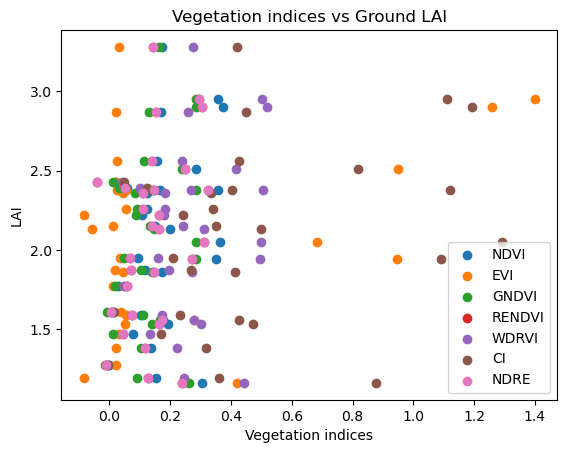

In [351]:
# Define the independent variables (vegetation indices)
X = new_df[['NDVI', 'EVI', 'GNDVI', 'RENDVI', 'WDRVI', 'CI', 'NDRE']]

# Define the dependent variable (ground LAI)
y = new_df['LAI']

# Create a scatter plot with all vegetation indices
fig, ax = plt.subplots()
for col in X.columns:
    ax.scatter(X[col], y, label=col)
ax.set_xlabel('Vegetation indices')
ax.set_ylabel('LAI')
ax.set_title('Vegetation indices vs Ground LAI')
ax.legend()
plt.show()

### Relationship of Satellite LAI with all Vegetation Indices

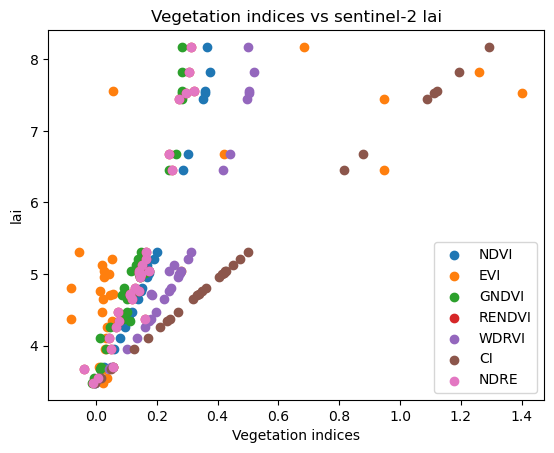

In [350]:
# Define the independent variables (vegetation indices)
X = new_df[['NDVI', 'EVI', 'GNDVI', 'RENDVI', 'WDRVI', 'CI', 'NDRE']]

# Define the dependent variable (ground LAI)
y = new_df['lai']

# Create a scatter plot with all vegetation indices
fig, ax = plt.subplots()
for col in X.columns:
    ax.scatter(X[col], y, label=col)
ax.set_xlabel('Vegetation indices')
ax.set_ylabel('lai')
ax.set_title('Vegetation indices vs sentinel-2 lai')
ax.legend()
plt.show()


### To check all models accuracy

In [318]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 79%|███████▊  | 33/42 [00:01<00:00, 35.96it/s]

OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(21, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.


100%|██████████| 42/42 [00:01<00:00, 28.06it/s]


In [319]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
NuSVR                                        0.91       0.92  0.04        0.01
AdaBoostRegressor                            0.90       0.91  0.04        0.11
KNeighborsRegressor                          0.88       0.90  0.05        0.02
LinearSVR                                    0.88       0.90  0.05        0.01
PassiveAggressiveRegressor                   0.88       0.90  0.05        0.01
ExtraTreesRegressor                          0.88       0.89  0.05        0.14
HuberRegressor                               0.87       0.88  0.05        0.03
RANSACRegressor                              0.86       0.88  0.05        0.02
RidgeCV                                      0.86       0.88  0.05        0.02
BayesianRidge                                0.86       0.88  0.05        0.01
LarsCV                                       0.86   

## y  = mx + c

In [348]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define X and y
X = df[['CI']]
y = df['LAI']

# Train linear regression model
model = LinearRegression().fit(X, y)

# Extract slope and intercept
slope = model.coef_
intercept = model.intercept_

# Generate equation in the form of y=mx+c
equation = 'y = '
for i, variable in enumerate(X.columns):
    equation += f'{round(slope[i], 2)}{variable} + '
equation += f'{round(intercept, 2)}'

print(equation)


y = 0.47CI + 1.85
